# Meme kanseri tahmini

## Veri seti hikayesi
Özellik Bilgileri:

###### 1) Kimlik numarası
###### 2) Tanı (M = kötü huylu, B = iyi huylu)
###### -3-32.Her hücre çekirdeği için on gerçek değerli özellik hesaplanır:

###### a) yarıçap (merkezden çevre üzerindeki noktalara olan mesafelerin ortalaması)
###### b) doku (gri tonlama değerlerinin standart sapması)
###### c) çevre
###### d-)alan
###### e) düzgünlük (yarıçap uzunluklarındaki yerel değişim)
###### f) kompaktlık (çevre^2 / alan - 1,0)
###### g)içbükeylik (konturun içbükey kısımlarının ciddiyeti)
###### h). içbükey noktalar (konturun içbükey kısımlarının sayısı)
###### i-) simetri
###### j). fraktal boyut ("kıyı şeridi yaklaşımı" - 1)

###### Bu özelliklerin ortalaması, standart hatası ve "en kötü" veya en büyüğü (en büyük üç değerin ortalaması) her görüntü için hesaplandı ve sonuçta 30 özellik elde edildi. Örneğin, alan 3 Ortalama Yarıçap, alan 13 Yarıçap SE, alan 23 En Kötü Yarıçaptır.

## Kütüphaneler

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

## Veri seti indirme

In [2]:
df = pd.read_csv("data.csv")
print("ilk 5 satır: \n",df.head())
print("son 5 satır: \n",df.tail())

ilk 5 satır: 
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wo

## Veri setini temizleme

In [3]:
df.isnull().sum()/df.shape[0]*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [4]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)


## Veri keşfi

In [5]:
df.info

<bound method DataFrame.info of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.277

In [6]:
print("boyut saıyısı: ",df.ndim)
print("\ntoplam gözlem sayısı: ",df.size)
print("\nsatır sayısı, sütun sayısı: ",df.shape)
print("\nHer sütunun veri tipleri: ",df.dtypes)

boyut saıyısı:  2

toplam gözlem sayısı:  17639

satır sayısı, sütun sayısı:  (569, 31)

Her sütunun veri tipleri:  diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothnes

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
df.diagnosis.unique()
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


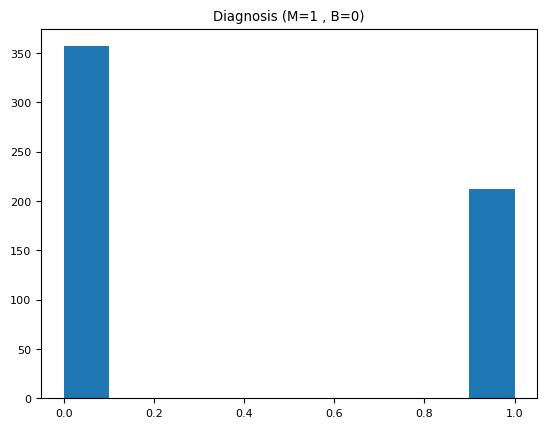

In [29]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.savefig('model_plot.png', format='png', dpi=300)  
plt.show()

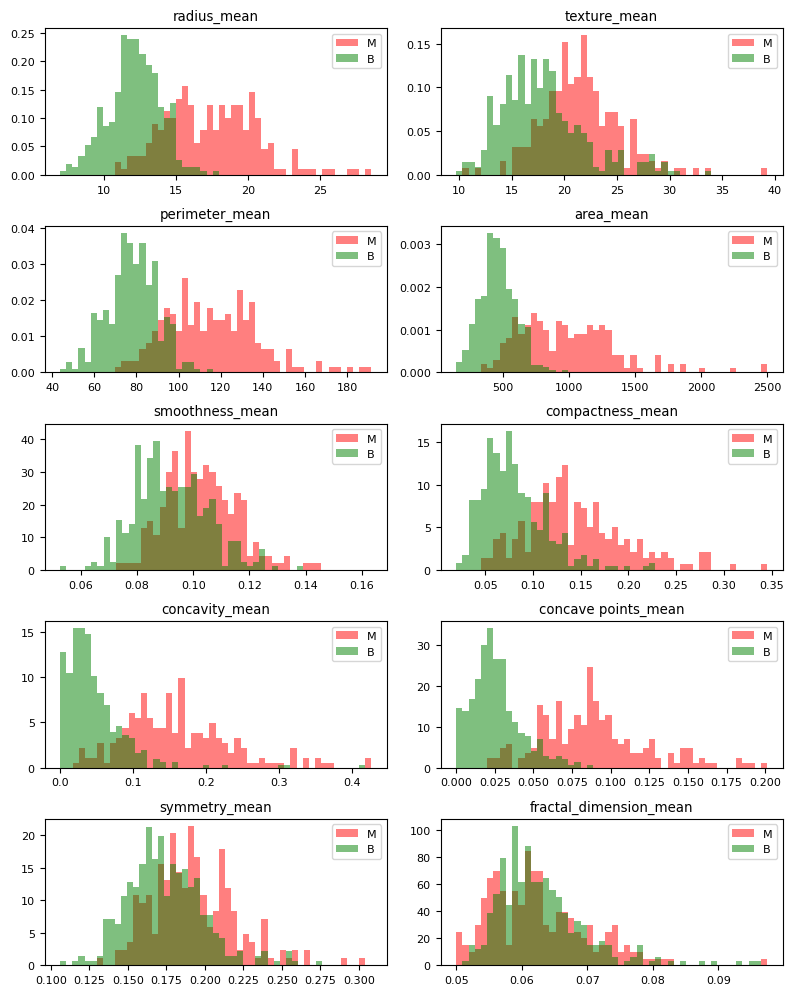

In [30]:
features_mean = list(df.columns[1:11])
dfM = df[df['diagnosis'] == 1]
dfB = df[df['diagnosis'] == 0]

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    feature = features_mean[idx]
    binwidth = (df[feature].max() - df[feature].min()) / 50
    bins = np.arange(df[feature].min(), df[feature].max() + binwidth, binwidth)
    
    ax.hist(dfM[feature], bins=bins, alpha=0.5, density=True, label='M', color='r')
    ax.hist(dfB[feature], bins=bins, alpha=0.5, density=True, label='B', color='g')
    
    ax.legend(loc='upper right')
    ax.set_title(feature)

plt.tight_layout()
plt.savefig('model_plot_grafik.png', format='png', dpi=300)  

plt.show()


## Test seti ve eğitim seti oluşturma

In [11]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
print(df.head())
print("--"*30)
print(X.head())
print("--"*30)
print(Y.head())


   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state = 1)

## Labelencoder ve StandardScaler

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

## XGBOOST

In [15]:
#!pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print('Accuracy:', xgb.score(X_test, y_test))

Accuracy: 0.951048951048951


In [16]:
xgb_params = {"max_depth":[2,5,8,10], #her bir karar ağacının maksimum derinliğini belirler
              "n_estimators":[100,500,1000,2000],#karar ağacı sayısını belirler
              "subsample":[0.6,0.8,1],#ağaç oluştururken kullanılacak alt örneklemin oranını belirler
              "learning_rate":[0.1,0.01,0.02,0.05]} #ağaç oluşturulurken kullanılan adım büyüklüğünü belirler

In [17]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1)

xgb_cv_model.fit(X_train, y_train)
print("En iyi parametreler: " + str(xgb_cv_model.best_params_))

En iyi parametreler: {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [19]:
xgb_tuned = XGBClassifier(max_depth=5,learning_rate=0.02,n_estimators=100,subsample=0.8,random_state = 21)
xgb_tuned.fit(X_train, y_train)

print('Accuracy:', xgb_tuned.score(X_test, y_test))
score = cross_val_score(xgb_tuned, X, Y, cv=10)
print('CV Score:', np.mean(score))

Accuracy: 0.965034965034965
CV Score: 0.968421052631579


## Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(verbose = False)
rf.fit(X_train,y_train)
print('Accuracy:', rf.score(X_test, y_test))

Accuracy: 0.9440559440559441


In [21]:
rf_params = {'max_depth':[2,5,8,10], #her bir karar ağacının maksimum derinliğini belirler
                'max_features':[2,5,8],# karar ağacının bölünme noktalarında özelliklerin maksimum sayısını belirler. 
                'n_estimators':[100,500,1000,2000]}#karar ağacı sayısını belirler


In [22]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1)
rf_cv_model.fit(X_train, y_train)
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'max_features': 8, 'n_estimators': 1000}


In [27]:
rf_tuned = RandomForestClassifier(max_depth=5, max_features=8, n_estimators=1000,random_state = 21,verbose = False)

rf_tuned.fit(X_train, y_train)

print('Accuracy:', rf_tuned.score(X_test, y_test))
score = cross_val_score(rf_tuned, X, Y, cv=10)
print('CV Score:', np.mean(score))


Accuracy: 0.965034965034965
CV Score: 0.9613721804511279


## Category Boosting (CatBoost)

In [24]:
#!pip install catboost
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=100, random_state=21, verbose=False)
cat_model.fit(X_train, y_train)

In [25]:
cat_params = { 'iterations':[200,500],# kaç tane ağaç oluşturacağını kontrol eder.
               'depth':[3,5,8],# ağaçların dallarının ne kadar derine gidebileceğini belirler.
               'learning_rate':[0.1,0.01,0.02,0.05]} #ağaç oluşturulurken kullanılan adım büyüklüğünü belirler

In [26]:
cat_model = CatBoostClassifier(verbose=False)

cat_cv_model = GridSearchCV(cat_model, cat_params, cv=10, n_jobs=-1)

cat_cv_model.fit(X_train, y_train)
print("En iyi parametreler: " + str(cat_cv_model.best_params_))

En iyi parametreler: {'depth': 3, 'iterations': 500, 'learning_rate': 0.02}


In [31]:
cat_tuned = CatBoostClassifier(depth=3,iterations=500,learning_rate=0.02,random_state=21,verbose = False)

cat_tuned.fit(X_train, y_train)

print('Accuracy:', cat_tuned.score(X_test, y_test))
score = cross_val_score(cat_tuned, X, Y, cv=10)
print('CV Score:', np.mean(score))

Accuracy: 0.951048951048951
CV Score: 0.9718671679197994


## Model Karşılaştırma

XGBClassifier: Accuracy: 96.5035%
RandomForestClassifier: Accuracy: 96.5035%
CatBoostClassifier: Accuracy: 95.1049%


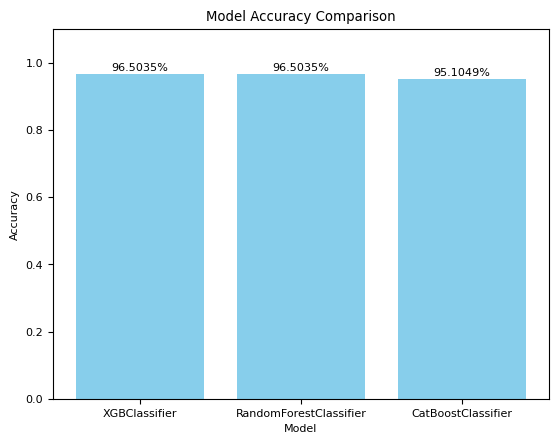

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

modeller = [xgb_tuned,rf_tuned,cat_tuned]

model_names = []
accuracies = []

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    model_names.append(isimler)
    accuracies.append(dogruluk)
    print(f"{isimler}: Accuracy: {dogruluk:.4%}")

plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.1)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4%}", ha='center')

plt.savefig('model_accuracy_comparison.png', format='png', dpi=300)  
plt.show()
